In [8]:
# Import necessary libraries
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from network.network import dynamic_network_model


In time step 0, 2 new satellites were launched, total nodes = 1011 

In time step 5, 2 new satellites were launched, total nodes = 1057 

In time step 10, 2 new satellites were launched, total nodes = 1107 

In time step 15, 2 new satellites were launched, total nodes = 1155 

In time step 20, 2 new satellites were launched, total nodes = 1207 

In time step 25, 2 new satellites were launched, total nodes = 1284 

In time step 30, 2 new satellites were launched, total nodes = 1361 

In time step 35, 2 new satellites were launched, total nodes = 1436 

In time step 40, 2 new satellites were launched, total nodes = 1532 

In time step 45, 2 new satellites were launched, total nodes = 1644 

In time step 50, 2 new satellites were launched, total nodes = 1759 

In time step 55, 2 new satellites were launched, total nodes = 1887 

In time step 60, 2 new satellites were launched, total nodes = 2036 

In time step 65, 2 new satellites were launched, total nodes = 2221 

In time step 70, 2 new

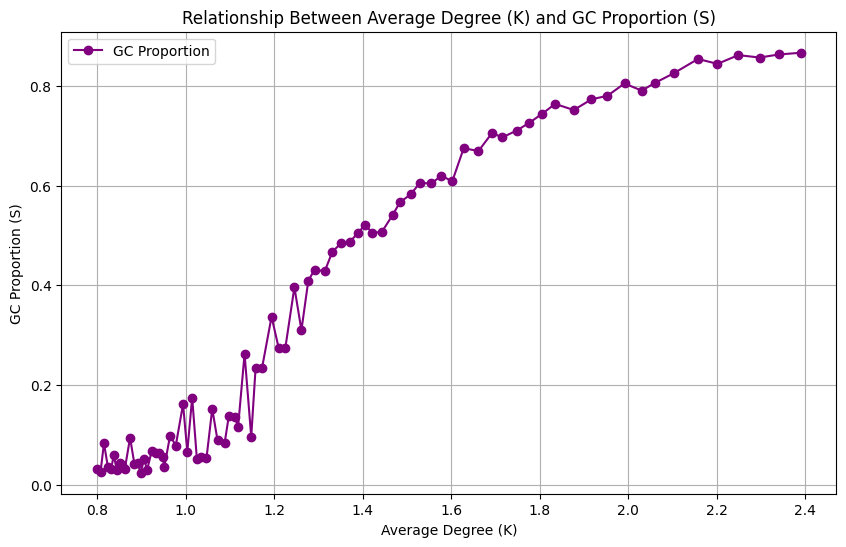

In [9]:
# Set parameters
N = 1000  # Initial number of nodes
P = 0.0008  # Collision probability
plow = 0.01  # Probability of generating new fragments
new_fragments_per_collision = 2  # Debris per collision
iterations = 100  # Number of time steps
launch_freq = 5  # Launch satellites every 5 time steps
nr_sat_launches = 2  # Number of satellites launched per launch

# Initialize the network
G = nx.empty_graph(N)
avg_degrees, gc_proportions = dynamic_network_model(
    G, iterations, P, plow, new_fragments_per_collision, nr_sat_launches, launch_freq)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(avg_degrees, gc_proportions, marker='o', color='purple', label='GC Proportion')
plt.title("Relationship Between Average Degree (K) and GC Proportion (S)")
plt.xlabel("Average Degree (K)")
plt.ylabel("GC Proportion (S)")
plt.grid(True)
plt.legend()
plt.show()


Running simulation 1/10...
In time step 0, 2 new satellites were launched, total nodes = 1009 

In time step 5, 2 new satellites were launched, total nodes = 1053 

In time step 10, 2 new satellites were launched, total nodes = 1104 

In time step 15, 2 new satellites were launched, total nodes = 1155 

In time step 20, 2 new satellites were launched, total nodes = 1215 

In time step 25, 2 new satellites were launched, total nodes = 1274 

In time step 30, 2 new satellites were launched, total nodes = 1330 

In time step 35, 2 new satellites were launched, total nodes = 1408 

In time step 40, 2 new satellites were launched, total nodes = 1495 

In time step 45, 2 new satellites were launched, total nodes = 1592 

In time step 50, 2 new satellites were launched, total nodes = 1698 

In time step 55, 2 new satellites were launched, total nodes = 1804 

In time step 60, 2 new satellites were launched, total nodes = 1952 

In time step 65, 2 new satellites were launched, total nodes = 21

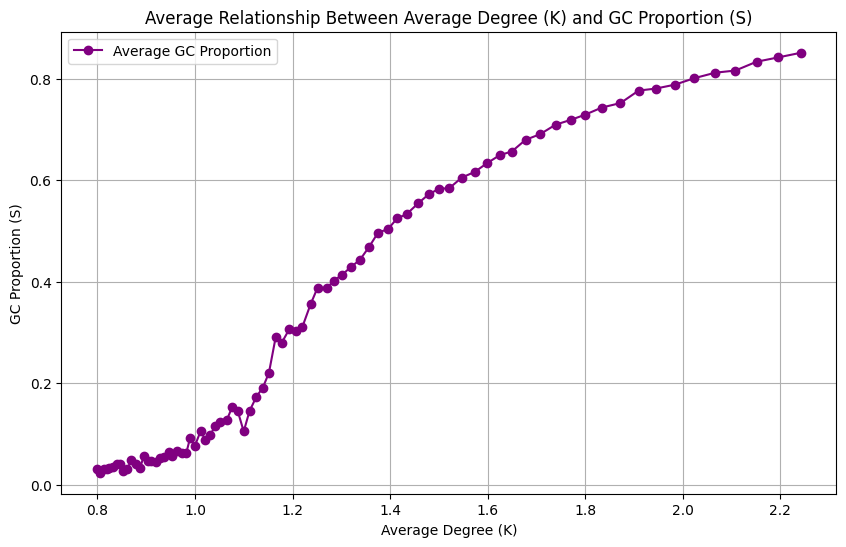

In [12]:
import matplotlib.pyplot as plt
from network.network import dynamic_network_model
import networkx as nx
import numpy as np

# Parameters
N = 1000  # Initial number of nodes
P = 0.0008  # Collision probability
plow = 0.01  # Probability of generating new fragments
new_fragments_per_collision = 2  # Debris per collision
iterations = 100  # Number of time steps
launch_freq = 5  # Launch satellites every 5 time steps
nr_sat_launches = 2  # Number of satellites launched per launch
num_simulations = 10  # Number of simulations to run

# Initialize lists to collect results across simulations
all_avg_degrees = []
all_gc_proportions = []

for sim in range(num_simulations):
    print(f"Running simulation {sim + 1}/{num_simulations}...")
    
    # Initialize the network for each simulation
    G = nx.empty_graph(N)
    
    # Run the simulation
    avg_degrees, gc_proportions = dynamic_network_model(
    G, iterations, P, plow, new_fragments_per_collision, nr_sat_launches, launch_freq)
    
    # Truncate or pad to ensure consistent length
    min_length = min(len(avg_degrees), len(gc_proportions), iterations)
    avg_degrees = avg_degrees[:min_length]
    gc_proportions = gc_proportions[:min_length]
    
    # Append results (padded or truncated)
    all_avg_degrees.append(avg_degrees)
    all_gc_proportions.append(gc_proportions)

# Convert lists to numpy arrays and pad to the maximum length
max_length = min([len(seq) for seq in all_avg_degrees])
all_avg_degrees = np.array([seq[:max_length] for seq in all_avg_degrees])
all_gc_proportions = np.array([seq[:max_length] for seq in all_gc_proportions])

# Compute the average values across simulations
average_degrees = np.mean(all_avg_degrees, axis=0)
average_gc_proportions = np.mean(all_gc_proportions, axis=0)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(average_degrees, average_gc_proportions, marker='o', color='purple', label='Average GC Proportion')
plt.title("Average Relationship Between Average Degree (K) and GC Proportion (S)")
plt.xlabel("Average Degree (K)")
plt.ylabel("GC Proportion (S)")
plt.grid(True)
plt.legend()
plt.show()
